#### XGBOOST

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

In [2]:
basepath = '/home/pcsor/facu/TP2'
train = pd.read_csv(basepath + '/train.csv',low_memory=False)
test = pd.read_csv(basepath + '/test.csv',low_memory=False)
titulos = pd.read_csv(basepath + '/titulos3.csv',low_memory=False)

In [3]:
#train.drop(train.filter(regex = 'nombre_area').columns, axis = 1, inplace = True)
#test.drop(test.filter(regex = 'nombre_area').columns, axis = 1, inplace = True)
#train.drop(train.filter(regex = 'tipo_de').columns, axis = 1, inplace = True)
#test.drop(test.filter(regex = 'tipo_de').columns, axis = 1, inplace = True)
#train.drop(train.filter(regex = 'nivel_laboral').columns, axis = 1, inplace = True)
#test.drop(test.filter(regex = 'nivel_laboral').columns, axis = 1, inplace = True)
train.drop(train.filter(regex = 'lsi').columns, axis = 1, inplace = True)
test.drop(test.filter(regex = 'lsi').columns, axis = 1, inplace = True)
train.drop(['nombre_zona1','nombre_zona2'], axis = 1, inplace = True)
test.drop(['nombre_zona1','nombre_zona2'], axis = 1, inplace = True)

In [4]:
train = pd.merge(train,titulos,how='left',on='idaviso',indicator=True)
train = train.query('_merge != "left_only"')
train = train.drop(['_merge'],axis=1)
test = pd.merge(test,titulos,how='left',on='idaviso')

In [5]:
train.columns.values,test.columns.values

(array(['cantidadDeVistas', 'cantidadPostulaciones',
        'cantidadPostulaciones10', 'cantidadPostulaciones4',
        'cantidadPostulacionesAviso10', 'cantidadPostulacionesAviso4',
        'idaviso', 'idpostulante', 'sepostulo', 'vistasPorAvisoTotales',
        'vistasPorPostulanteTotales', 'cantidadDeVistas15',
        'vistasPorAviso15', 'vistasPorPostulante15', 'nombre_zona0',
        'sexo', 'edad', 'nombre', 'estado', 'lsi0', 'lsi1', 'lsi2', 'lsi3',
        'lsi4', 'lsi5', 'lsi6', 'lsi7', 'lsi8', 'lsi9', 'lsi10', 'lsi11',
        'lsi12', 'lsi13', 'lsi14', 'lsi15', 'lsi16', 'lsi17', 'lsi18',
        'lsi19', 'lsi20', 'lsi21', 'lsi22', 'lsi23', 'lsi24', 'lsi25',
        'lsi26', 'lsi27', 'lsi28', 'lsi29', 'lsi30', 'lsi31', 'lsi32',
        'lsi33', 'lsi34', 'lsi35', 'lsi36', 'lsi37', 'lsi38', 'lsi39',
        'lsi40', 'lsi41', 'lsi42', 'lsi43', 'lsi44', 'lsi45', 'lsi46',
        'lsi47', 'lsi48', 'lsi49', 'lsi50', 'lsi51', 'lsi52', 'lsi53',
        'lsi54', 'lsi55', 'lsi56', 'l

In [6]:
testid = test['id']
train_y = train['sepostulo']
test = test.drop(['idaviso','idpostulante','id'],axis=1)
train = train.drop(['idaviso','idpostulante','sepostulo'],axis=1)

In [7]:
xgb1 = xgb.XGBClassifier(eval_metric='auc',n_jobs=4,silent=False,learning_rate=0.1,n_estimators=100,max_depth=5)
xgb1.fit(train,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
       subsample=1)

<BarContainer object of 76 artists>

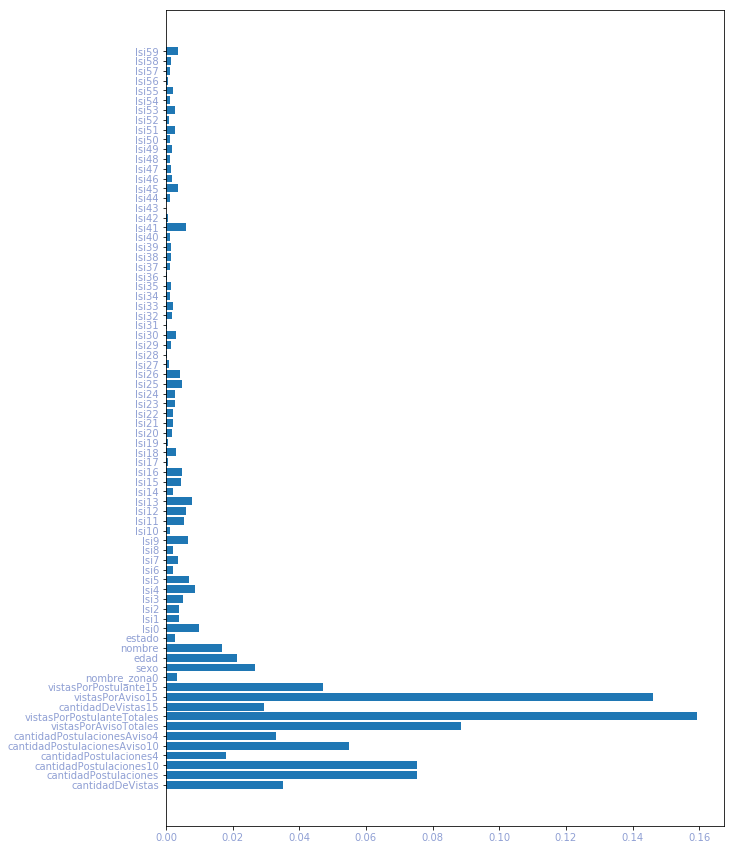

In [8]:
plt.figure(figsize=(10,15))
plt.xticks(fontsize=10,color='#90A0D4')
plt.yticks(fontsize=10,color='#90A0D4')
plt.barh(train.columns.values,xgb1.feature_importances_)

In [9]:
predic = xgb1.predict_proba(test) 

In [10]:
predic[:,1].mean()

0.3788249

In [11]:
submit = pd.DataFrame()
submit['id'] = testid
submit['sepostulo'] = predic[:,1]
submit['id'] = submit['id'].apply(int)
submit.to_csv('/home/pcsor/facu/TP2/submit1.csv',index=False)